In [1]:
#several usefull imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random

Using TensorFlow backend.


In [47]:
#Random start of population
#genomes as a list of gene sequences
def initialise():
    genomes =[]
    for i in range(8):
        genomes.append([np.random.randint(2, size=6)]) # add 5 randomly initialised indiviudals
    
    #entschachtelungsprozess
    ent = [5]*len(genomes)
    i = 0
    for k in genomes:
        for l in k:
            
            ent[i] =l
            i = i+1
    

    return ent

def craschcheck(popul):
    i=0
    for indi in popul:
        #print(indi)
        if check(indi) == True:
            print('')
            
        if check(indi) == False:
            indi[2] = 1
            print(popul[i])
            popul[i] = indi
            print('Problem')
        
            
        i = i +1
                

            
def check(indi):
    for gen in indi:
        if gen == 1:
            return True
    return False



#usefull functions

def paring(mom,dad):
    return(np.concatenate((mom[:3], dad[3:]), axis=0))

def entschachteln(genos):
    #print(len(genos))
    neue = [0,0]
    i = 0
    for k in genos:
        for l in k:
            #print(l)
            neue[i] =l
            i = i+1

    return (neue)

def mutation(popul):
    position = random.randrange(0, len(popul))
    gencode = popul[position]
    
    decider = random.uniform(0, 1)
    posi = 0
    if decider < 0.8 :
       
        print('Mutation')
        posi = random.randrange(0, len(gencode))
    
        if gencode[posi] == 1:
            gencode[posi] = 0
        elif gencode[posi] == 0:
            gencode[posi] = 1
            
    popul[position] = np.array(gencode)
    
    return popul

def mutationeach(popul):
  
    i = 0    
    for gencode in popul:
        decider = random.uniform(0, 1)
        if decider < 0.35: 
            print('Muation')
            posi = 0
            posi = random.randrange(0, len(gencode))
           
            if gencode[posi] == 1:
                gencode[posi] = 0
            elif gencode[posi] == 0:
                gencode[posi] = 1
            
            popul[i] = np.array(gencode)
        
            
        i = i +1
    

            
    
    return popul
    

''' A one to one replacement reproduction '''
def OneToOneReplacement(maxis, actualpop): 
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-5:][::-1]
    #print('Highest acc at')
    #print(indices)
    parents= []
    
   
    for ind in indices:    
        parents.append(actualpop[ind])
    
    random.shuffle(parents)
    f= 0
   
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs


def fortpflanzung (maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-4:][::-1] # hier verändern, wenn wir individuen anzahl erhöhen die erste zahl muss die hälfte der anzahl sein
    #print('Highest acc at')
    #print(indices)
    parents= []
    
    
    for ind in indices:    
        parents.append(actualpop[ind])
   
    

    random.shuffle(parents)
    f= 0
 
    
    while f < len(parents): 
        #print(f)
        f = f -1
        mom = parents[f]
        f= f +1
        #print(f)
        dad = parents[f]    
        f= f +1
        decider = random.uniform(0, 1) # decides random how the cross-over works
        if decider < 0.51 :
            child = paring(mom,dad)
            childs.append(child)
        else:
            child = paring(dad,mom)
            childs.append(child)

    

    parents = np.concatenate((parents, childs), axis=0) 
    random.shuffle(parents) # muss heir vllt parenets = random.shuffle(parents) hin? nochmal testen
    
 
    return parents




In [3]:


diction = {
    
            'item2': 2,
}




In [4]:
def netzdurchlaufeinzeln(element):
    
    batch_size = 128
    num_classes = 10
    epochs = 12

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
            ########
            
            

    for gen in element:
        if (gen== 0):
            model.add(Conv2D(64, (3, 3), activation='relu'))
        elif (gen == 1):
            model.add(Dense(128, activation='relu'))



    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return score[1]

In [5]:
def getaccur(popul):
    values= []
    for e in popul:
        name = str(e)
        print(str(e))
        if name in diction:
            print('already stored')
            print(diction[name])
            values.append(diction[name])
        else:
            print('new one')
            wert = netzdurchlaufeinzeln(e)
            diction[str(e) ] = wert
            values.append(wert)
    return values

In [6]:

# Hauptmethode2
start = time.time()


DURCHGÄNGE = 20 # variable to clarify number of generations
actualpop= initialise()
craschcheck(actualpop)

print('Aktuelle : ', actualpop)
evalaccuris = []
saved = actualpop #unn
i = 1

    
while i < DURCHGÄNGE+1:
    
    nummer = i
    accuri = getaccur(actualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(accuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(accuri))
    #print(actualpop)
    actualpop = fortpflanzung(accuri, actualpop)
    actualpop = mutationeach(actualpop)
    craschcheck(actualpop)
   
    evalaccuris.append([i , sum(accuri)/len(accuri),np.amax(accuri),actualpop[np.argmax(accuri)]])
    i = i+1
    
    
    



print('Wartezeit: ')
end = time.time()
seconds = end - start
minutes = seconds / 60
print(minutes)
hours = minutes/60
print(hours)









Aktuelle :  [array([0, 1, 1, 0, 1, 1]), array([0, 1, 0, 0, 1, 0]), array([0, 0, 0, 1, 0, 1]), array([0, 1, 0, 1, 1, 1]), array([1, 1, 0, 1, 0, 0]), array([0, 1, 1, 0, 0, 1]), array([1, 0, 0, 0, 0, 1]), array([0, 1, 0, 1, 1, 1])]
[0 1 1 0 1 1]
new one


W1001 16:44:35.822004  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1001 16:44:35.838958  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 16:44:35.840954  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 16:44:35.878851  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1001 16:44:35.881844  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Ana

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W1001 16:44:36.082308  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1001 16:44:36.091285  7324 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1001 16:44:36.280809  7324 deprecation.py:323] From C:\Users\vivia\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 225us/step - loss: 0.2820 - acc: 0.9111 - val_loss: 0.0649 - val_acc: 0.97982970 
Epoch 2/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0560 - val_acc: 0.9828
Epoch 3/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0543 - acc: 0.9833 - val_loss: 0.0570 - val_acc: 0.9814
Epoch 4/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0428 - acc: 0.9871 - val_loss: 0.0319 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0358 - acc: 0.9892 - val_loss: 0.0414 - val_acc: 0.9873s - loss: 0.0359 - acc: 0.
Epoch 6/12
60000/60000 [==============================] - 10s 175us/step - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0264 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.02

60000/60000 [==============================] - 11s 187us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0253 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0318 - acc: 0.9900 - val_loss: 0.0258 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0280 - acc: 0.9913 - val_loss: 0.0266 - val_acc: 0.9920
Epoch 8/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0249 - acc: 0.9924 - val_loss: 0.0204 - val_acc: 0.9925
Epoch 9/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0208 - val_acc: 0.9929
Epoch 10/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0253 - val_acc: 0.9919
Epoch 11/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0194 - acc: 0.9938 - val_loss: 0.0180 - val_acc: 0.9937
Epoch 12/12
60000/60000 [===========

60000/60000 [==============================] - 9s 158us/step - loss: 0.0246 - acc: 0.9918 - val_loss: 0.0256 - val_acc: 0.9910
Epoch 8/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0236 - acc: 0.9926 - val_loss: 0.0204 - val_acc: 0.9934
Epoch 9/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0217 - val_acc: 0.9930
Epoch 10/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0164 - acc: 0.9946 - val_loss: 0.0194 - val_acc: 0.9938
Epoch 11/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0193 - val_acc: 0.9939
Epoch 12/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.0301 - val_acc: 0.9908
Test loss: 0.030094631445993947
Test accuracy: 0.9908
[1 1 0 1 0 1]
new one
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, va

60000/60000 [==============================] - 11s 177us/step - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0245 - val_acc: 0.9920
Epoch 11/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.0266 - val_acc: 0.9912
Epoch 12/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0266 - val_acc: 0.9919
Test loss: 0.026582789209659494
Test accuracy: 0.9919
[0 1 1 0 0 1]
already stored
0.9939
[0 0 0 0 0 1]
already stored
0.9947
[0 0 0 0 0 1]
already stored
0.9947
[1 1 1 0 0 1]
new one
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 228us/step - loss: 0.2556 - acc: 0.9208 - val_loss: 0.0575 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.0706 - acc: 0.9787 - val_loss: 0.0398 - val_acc: 0.9872
Epoch 3

60000/60000 [==============================] - 9s 150us/step - loss: 0.0489 - acc: 0.9854 - val_loss: 0.0329 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0493 - val_acc: 0.9848
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0336 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0251 - acc: 0.9922 - val_loss: 0.0329 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0226 - acc: 0.9930 - val_loss: 0.0218 - val_acc: 0.9926
Epoch 8/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0193 - acc: 0.9940 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 9/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0305 - val_acc: 0.9918
Epoch 10/12
60000/60000 [====================

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.4340 - acc: 0.8572 - val_loss: 0.0499 - val_acc: 0.9838
Epoch 2/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0797 - acc: 0.9772 - val_loss: 0.0394 - val_acc: 0.9873
Epoch 3/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0522 - acc: 0.9848 - val_loss: 0.0372 - val_acc: 0.9883
Epoch 4/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0414 - acc: 0.9883 - val_loss: 0.0350 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0321 - acc: 0.9905 - val_loss: 0.0209 - val_acc: 0.9938
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0289 - acc: 0.9914 - val_loss: 0.0203 - val_acc: 0.9941
Epoch 7/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0241 - acc: 0.9931 - val_loss: 0.0420 

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 208us/step - loss: 0.3104 - acc: 0.9004 - val_loss: 0.0589 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0722 - acc: 0.9780 - val_loss: 0.0375 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0499 - acc: 0.9848 - val_loss: 0.0349 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0390 - acc: 0.9880 - val_loss: 0.0270 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0326 - acc: 0.9896 - val_loss: 0.0225 - val_acc: 0.9932
Epoch 6/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0245 - val_acc: 0.9923
Epoch 7/12
60000/60000 [====================

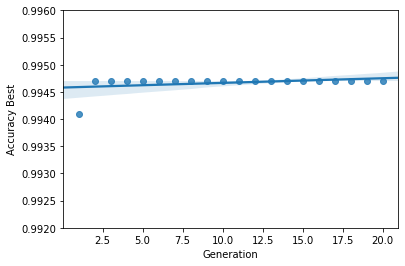

<Figure size 1800x1800 with 0 Axes>

In [16]:
#Visualisation
df = pd.DataFrame(data =evalaccuris)
df.rename(columns={0: 'Generation',1: 'Accuracy Mean',2:'Accuracy Best',3: 'Best Individum'}, inplace=True)
df
fr =sns.regplot(x=df['Generation'],y=df['Accuracy Best'])
plt.ylim(0.992, 0.996)

plt.figure(figsize=(25,25))
plt.tight_layout()
plt.show()
fig = fr.get_figure()
fig.savefig('hilf22.png') #Best_Accuracies_in_Generation ( M: 0.35)



In [8]:
print(diction)
print(actualpop) 

{'item2': 2, '[0 1 1 0 1 1]': 0.9933, '[0 1 0 0 1 0]': 0.9935, '[0 0 0 1 0 1]': 0.9934, '[0 1 0 1 1 1]': 0.9932, '[1 1 0 1 0 0]': 0.9941, '[0 1 1 0 0 1]': 0.9939, '[1 0 0 0 0 1]': 0.9928, '[0 0 0 0 0 1]': 0.9947, '[0 1 0 0 1 1]': 0.9908, '[1 1 0 1 0 1]': 0.9933, '[1 0 0 1 0 1]': 0.9925, '[0 1 0 0 0 1]': 0.9943, '[0 1 1 1 0 1]': 0.9919, '[1 1 1 0 0 1]': 0.9928, '[0 0 1 0 0 1]': 0.994, '[0 0 1 0 0 0]': 0.994, '[0 0 0 0 1 1]': 0.9937, '[1 0 1 0 0 0]': 0.993, '[0 0 1 0 1 0]': 0.9943, '[0 0 0 0 1 0]': 0.9929, '[0 1 1 0 1 0]': 0.9935, '[0 0 1 0 1 1]': 0.9927, '[1 0 1 0 1 0]': 0.9924, '[0 0 1 1 0 1]': 0.9939}
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [9]:
evalaccuris

[[1, 0.9934249999999999, 0.9941, array([0, 1, 0, 0, 1, 0])],
 [2, 0.99325, 0.9947, array([0, 1, 1, 1, 0, 1])],
 [3, 0.9937625, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [4, 0.9945124999999999, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [5, 0.9945125, 0.9947, array([0, 1, 0, 0, 0, 1])],
 [6, 0.99425, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [7, 0.9942875000000001, 0.9947, array([0, 0, 1, 0, 0, 1])],
 [8, 0.9943624999999999, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [9, 0.9942875, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [10, 0.994125, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [11, 0.9944624999999999, 0.9947, array([0, 0, 0, 1, 0, 1])],
 [12, 0.9938874999999999, 0.9947, array([0, 0, 1, 0, 0, 0])],
 [13, 0.9939499999999999, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [14, 0.9942375, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [15, 0.9941625000000001, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [16, 0.9943624999999999, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [17, 0.99465, 0.9947, array([0, 0, 0, 0, 0, 1])],
 [18, 0.99385, 0.9947, array([0, 0

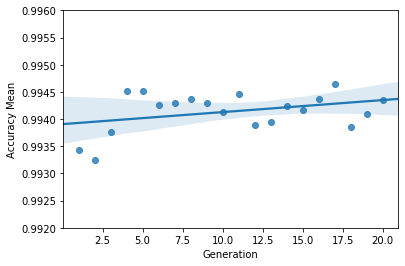

In [12]:
#Visualisation von dem durchschnitt der accuracy

fr =sns.regplot(x=df['Generation'],y=df['Accuracy Mean'])

plt.ylim(0.992, 0.996)

fig = fr.get_figure()
fig.savefig('av1.png')


In [11]:
Generationen 20
Individuen 8
Gencodelänge 6

Mutationen insgesamt:
gencode doppelungen: 

SyntaxError: invalid syntax (<ipython-input-11-08a3789eb3d9>, line 1)

In [ ]:

# Hauptmethode2
start = time.time()


DURCHGÄNGE = 50 # variable to clarify number of generations
aactualpop= initialise()
craschcheck(aactualpop)

print('Aktuelle : ', aactualpop)
aevalaccuris = []
saved = aactualpop #unn
i = 1

    
while i < DURCHGÄNGE+1:
    
    nummer = i
    aaccuri = getaccur(aactualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(aaccuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(aaccuri))
    #print(actualpop)
    aactualpop = fortpflanzung(aaccuri, aactualpop)
    aactualpop = mutationeach(aactualpop)
    craschcheck(aactualpop)
   
    aevalaccuris.append([i , sum(aaccuri)/len(aaccuri),np.amax(aaccuri),actualpop[np.argmax(aaccuri)]])
    i = i+1
    
    
    



print('Wartezeit: ')
end = time.time()
seconds = end - start
minutes = seconds / 60
print(minutes)
hours = minutes/60
print(hours)










Aktuelle :  [array([0, 1, 0, 1, 1, 0]), array([0, 0, 1, 1, 1, 0]), array([0, 0, 0, 1, 0, 1]), array([1, 0, 0, 0, 1, 1]), array([1, 0, 1, 0, 1, 0]), array([0, 1, 1, 0, 0, 1]), array([0, 0, 0, 0, 1, 1]), array([0, 1, 1, 1, 0, 0])]
[0 1 0 1 1 0]
new one
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 273us/step - loss: 0.3188 - acc: 0.8976 - val_loss: 0.0750 - val_acc: 0.9779
Epoch 2/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0796 - acc: 0.9757 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 3/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.0564 - acc: 0.9823 - val_loss: 0.0324 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0270 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 12s 

In [ ]:
#Visualisation
dfa = pd.DataFrame(data =aevalaccuris)
dfa.rename(columns={0: 'Generation',1: 'Accuracy Mean',2:'Accuracy Best',3: 'Best Individum'}, inplace=True)
dfa
fr =sns.regplot(x=dfa['Generation'],y=dfa['Accuracy Best'])
plt.ylim(0.992, 0.996)

plt.figure(figsize=(25,25))
plt.tight_layout()
plt.show()
fig = fr.get_figure()
fig.savefig('best fifity 0.35.png') #Best_Accuracies_in_Generation ( M: 0.35)

In [ ]:
#Visualisation von dem durchschnitt der accuracy

fr =sns.regplot(x=dfa['Generation'],y=dfa['Accuracy Mean'])

plt.ylim(0.992, 0.996)

fig = fr.get_figure()
fig.savefig('mean 50 0.35.png')

In [33]:
print(diction)

{'item2': 2, '[0 1 1 0 1 1]': 0.9933, '[0 1 0 0 1 0]': 0.9935, '[0 0 0 1 0 1]': 0.9934, '[0 1 0 1 1 1]': 0.9932, '[1 1 0 1 0 0]': 0.9941, '[0 1 1 0 0 1]': 0.9939, '[1 0 0 0 0 1]': 0.9928, '[0 0 0 0 0 1]': 0.9947, '[0 1 0 0 1 1]': 0.9908, '[1 1 0 1 0 1]': 0.9933, '[1 0 0 1 0 1]': 0.9925, '[0 1 0 0 0 1]': 0.9943, '[0 1 1 1 0 1]': 0.9919, '[1 1 1 0 0 1]': 0.9928, '[0 0 1 0 0 1]': 0.994, '[0 0 1 0 0 0]': 0.994, '[0 0 0 0 1 1]': 0.9937, '[1 0 1 0 0 0]': 0.993, '[0 0 1 0 1 0]': 0.9943, '[0 0 0 0 1 0]': 0.9929, '[0 1 1 0 1 0]': 0.9935, '[0 0 1 0 1 1]': 0.9927, '[1 0 1 0 1 0]': 0.9924, '[0 0 1 1 0 1]': 0.9939, '[0 0 0 1 0 0]': 0.9944, '[1 1 1 1 1 1]': 0.9859, '[0 0 0 1 1 0]': 0.994, '[1 1 1 0 0 0]': 0.994, '[1 1 1 1 0 0]': 0.993, '[0 1 0 1 0 1]': 0.9938, '[1 1 0 0 0 1]': 0.9935, '[0 1 0 0 0 0]': 0.993, '[1 1 0 1 1 0]': 0.9919, '[1 1 1 0 1 0]': 0.9937, '[1 1 0 0 1 1]': 0.9927, '[0 0 1 1 1 0]': 0.9934, '[0 1 1 0 0 0]': 0.9922, '[0 1 1 1 1 1]': 0.9916, '[1 0 1 1 0 0]': 0.9942, '[1 0 1 1 1 0]': 0.

In [ ]:
aevalaccuris

In [ ]:
import pickle


with open("mySavedDict.txt", "wb") as myFile:
    pickle.dump(diction, myFile)

In [ ]:
with open("mySavedDict.txt", "rb") as myFile:
    myNewPulledInDictionary = pickle.load(myFile)

print (myNewPulledInDictionary)

{'item2': 2, '[0 1 1 0 1 1]': 0.9933, '[0 1 0 0 1 0]': 0.9935, '[0 0 0 1 0 1]': 0.9934, '[0 1 0 1 1 1]': 0.9932, '[1 1 0 1 0 0]': 0.9941, '[0 1 1 0 0 1]': 0.9939, '[1 0 0 0 0 1]': 0.9928, '[0 0 0 0 0 1]': 0.9947, '[0 1 0 0 1 1]': 0.9908, '[1 1 0 1 0 1]': 0.9933, '[1 0 0 1 0 1]': 0.9925, '[0 1 0 0 0 1]': 0.9943, '[0 1 1 1 0 1]': 0.9919, '[1 1 1 0 0 1]': 0.9928, '[0 0 1 0 0 1]': 0.994, '[0 0 1 0 0 0]': 0.994, '[0 0 0 0 1 1]': 0.9937, '[1 0 1 0 0 0]': 0.993, '[0 0 1 0 1 0]': 0.9943, '[0 0 0 0 1 0]': 0.9929, '[0 1 1 0 1 0]': 0.9935, '[0 0 1 0 1 1]': 0.9927, '[1 0 1 0 1 0]': 0.9924, '[0 0 1 1 0 1]': 0.9939, '[0 0 0 1 0 0]': 0.9944, '[1 1 1 1 1 1]': 0.9859, '[0 0 0 1 1 0]': 0.994, '[1 1 1 0 0 0]': 0.994, '[1 1 1 1 0 0]': 0.993, '[0 1 0 1 0 1]': 0.9938, '[1 1 0 0 0 1]': 0.9935, '[0 1 0 0 0 0]': 0.993, '[1 1 0 1 1 0]': 0.9919, '[1 1 1 0 1 0]': 0.9937, '[1 1 0 0 1 1]': 0.9927, '[0 0 1 1 1 0]': 0.9934, '[0 1 1 0 0 0]': 0.9922, '[0 1 1 1 1 1]': 0.9916, '[1 0 1 1 0 0]': 0.9942, '[1 0 1 1 1 0]': 0.